<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>K-Means кластеризация</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

Подключение стилей оформления

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Баяндин" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 1 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задание 1</b></p>

In [34]:
from os import getcwd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import adjusted_rand_score

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T1.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Построить графики X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - реальные кластеры)</li>
    <li>Произвести кластеризацию методом KMean и построить два графика NInit-ARS для init=Random и init=K-Means++, где
<br><b>NInit</b> - количество повторений выполнения алгоритма кластеризации - от 1 до 40, 
<br><b>ARS</b> (adjusted_rand_score) - ошибка кластеризации, 
<br><b>параметры KMean</b>: n_clusters=5, max_iter=300, init="random", n_init=i</li>
    <li>Повторить шаг 4 несколько раз</li>
    <li>Сделать выводы по полученным результатам</li>
</ol>

In [33]:
# Ваш код
df = pd.read_csv("data/A4_KMeans/Cluster_A8_T1.csv")
df.head()

,X1,X2,X3,Y
0,0.396845,1.463098,-2.529556,1
1,-1.584280,-2.366886,1.562455,4
2,2.164778,2.075564,3.036170,0
3,-0.831406,-3.857093,2.808180,4
4,1.847920,1.817510,-2.712600,1


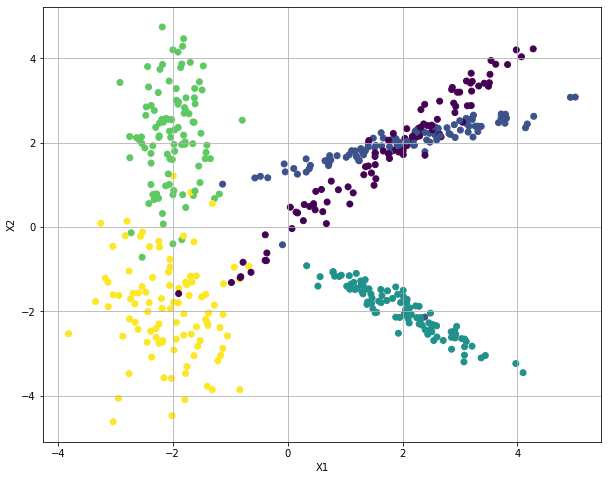

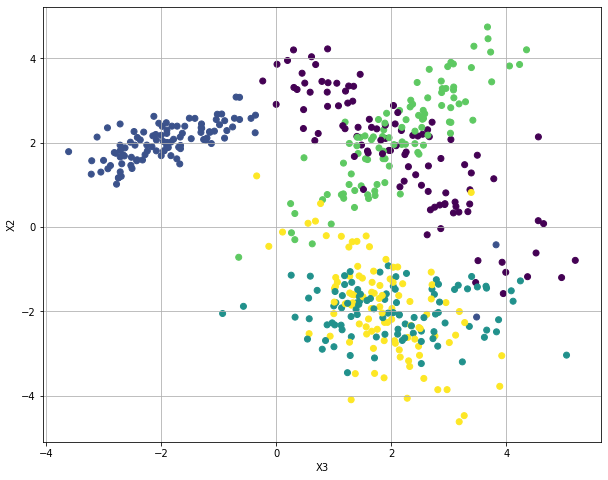

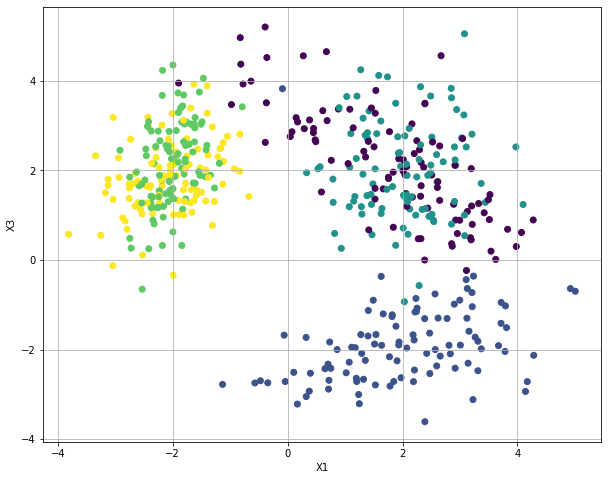

In [30]:
for i,j in [("X1","X2"),("X3","X2"),("X1","X3")]:
    
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.scatter(df[i],df[j],c= df.Y.tolist())
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

In [40]:
from sklearn.cluster import KMeans

# cl = KMeans(init="Random",n_clusters=5, max_iter=300, n_init=i)
# cl2 = KMeans(init="K-Means++",n_clusters=5, max_iter=300, n_init=i)

In [63]:
x = [x for x in range(1,30)]
y =[]
for i in x:
    cl = KMeans(init="random",n_clusters=5, max_iter=300,n_init=i)
    cl2 = KMeans(init="k-means++",n_clusters=5, max_iter=300, n_init=i)
    y.append( [ adjusted_rand_score(df.Y,cl.fit_predict(df[["X1","X2","X3"]])), 
              adjusted_rand_score(df.Y,cl2.fit_predict(df[["X1","X2","X3"]])) ] )

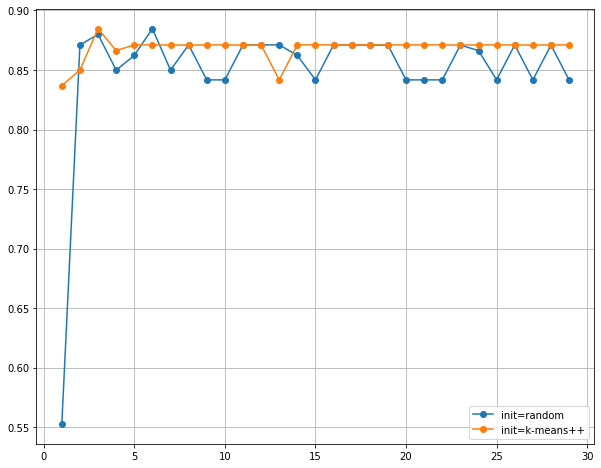

In [72]:
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(x,np.array(y)[:,0],"o-",label = "init=random")
plt.plot(x,np.array(y)[:,1],"o-",label = "init=k-means++")
plt.legend(loc="best")


#### Из графика следует, что инициализация методом KMeans++ показала более качественный результат при количестве итераций равном 3.

<p><b>Задание 2</b></p>

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T2.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Произвести кластеризацию методом KMean и построить график NCluster-Inertia, где
<br><b>NCluster</b> - количество кластеров,
<br><b>Inertia</b> - сумма расстояний наблюдений до их ближайших центров кластеров,
<br><b>Параметры</b> KMean: n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20</li>
    <li>Выбрать подходящее количество кластеров</li>
    <li>Построить граифики X1-X2, X1-X3, X2-X3 и X1-X2-Y_pred, X1-X3-Y_pred, X2-X3-Y_pred (Y_pred - предсказанные кластеры)</li>
</ol>

In [ ]:
# Ваш код